In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import cv2

#### Loading user provided image

In [236]:
path = input("Past the complete of the image: ")
path.replace("\\","\\")
img = Image.open(path).convert("L").resize((28,28))
pixels = np.array(img)

Past the complete of the image:  C:\Users\student\Desktop\week5\digit_2.png


'C:\\Users\\student\\Desktop\\week5\\digit_2.png'

#### Invert if background is light

In [ ]:
if pixels.mean() > 127:
    pixels = 255 - pixels

#### Enhancing the image

In [ ]:
for i,px in enumerate(pixels.reshape((1,784))[0]):
    if px > 120:
        pixels.reshape((1,784))[0][i]= 255
    else:
        pixels.reshape((1,784))[0][i]= 0

#### Extract bounding box of digit

In [ ]:
coords = cv2.findNonZero(pixels)
x,y,w,h = cv2.boundingRect(coords)
digit = pixels[y:y+h,x:x+w]
resized_digit = cv2.resize(digit,(20,20))

#### Placing the digit in the center

In [ ]:
canvas = np.zeros((28,28), dtype = np.uint8)
canvas[4:24,4:24] = resized_digit

#### Coversion of image into a DataFrame

In [ ]:
X = pd.DataFrame(canvas.reshape((1,784)), columns = [f"p{i+1}" for i in range(784)], index= range(1))

#### Load model and scaler

In [ ]:
with open("C:\\Users\\student\\Desktop\\week5\\scaler.pkl", 'rb') as sc:
    scaler = joblib.load(sc)
with open("C:\\Users\\student\\Desktop\\week5\\model.pkl", 'rb') as md:
    model = joblib.load(md)

#### Scalling

In [245]:
X_scaled = scaler.transform(X)

#### Prediction

In [247]:
Y = model.predict(X_scaled)
print(f"The digit is: {Y[0]}")

#### Plot the Image

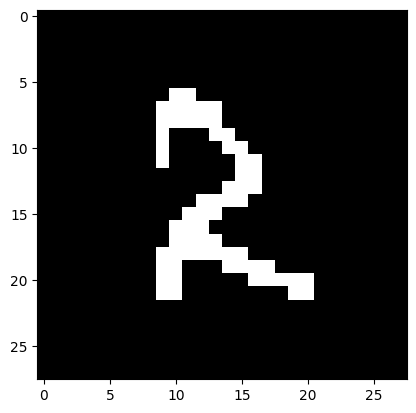

In [252]:
plt.imshow(pixels.reshape(28,28), cmap="gray")
plt.show()